Step 1 : Importing necessary libraries

In [158]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ttest_1samp,ttest_ind,levene,shapiro,iqr,mannwhitneyu,wilcoxon,iqr
from statsmodels.stats.power import ttest_power
import scipy.stats as stats

Step 2 : Reading of Golf data

In [120]:
golf = pd.read_csv('SM4-Golf.csv')

In [121]:
golf.head()

,Current,New
0,264,277
1,261,269
2,267,263
3,272,266
4,258,262


In [122]:
golf.tail()

,Current,New
35,267,263
36,279,261
37,274,255
38,276,263
39,262,279


In [123]:
golf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 2 columns):
Current    40 non-null int64
New        40 non-null int64
dtypes: int64(2)
memory usage: 720.0 bytes


There are no null values in the dataset 

In [124]:
golf.describe()

,Current,New
count,40.000000,40.000000
mean,270.275000,267.500000
std,8.752985,9.896904
min,255.000000,250.000000
25%,263.000000,262.000000
50%,270.000000,265.000000
75%,275.250000,274.500000
max,289.000000,289.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000009F31A47978>,
      dtype=object)

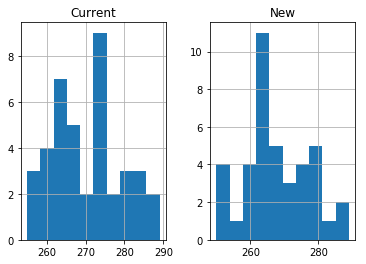

In [125]:
golf.hist()

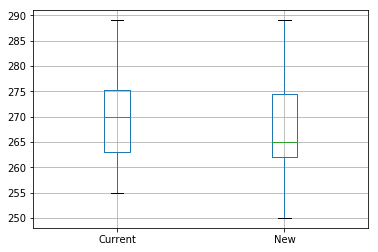

In [126]:
golf.boxplot()

There are no outliers in both the data for the Current and New golf balls

Since the same test of driving distance is applied on two populations of Current and the new golf ball, the samples are classified under unpaired samples

Step 3 : Splitting the data into two samples of Current and New golf balls

In [127]:
Current = golf.iloc[:,0]

In [128]:
Current.head()

0    264
1    261
2    267
3    272
4    258
Name: Current, dtype: int64

In [157]:
iqr(Current, rng = (25,75))

12.25

In [129]:
meanC = Current.mean()
meanC

270.275

In [130]:
varC = Current.var()
varC

76.61474358974361

In [131]:
New = golf.iloc[:,1]

In [132]:
New.head()

0    277
1    269
2    263
3    266
4    262
Name: New, dtype: int64

In [156]:
iqr(New, rng = (25,75))

12.5

In [133]:
meanN = New.mean()
meanN


267.5

In [134]:
varN= New.var()
varN

97.94871794871794

Step 4 : Defining Null and Alternate Hypothesis

The null hypothesis is that the driving distance of current ball is lesser than or equal to New ball and alternate hypothesis
is that the driving distance of Current ball is greater than the New ball assuming more driving distance is desired.

 H0 : driving_distance(current) <= driving_distance(new)
 
 H1 : driving_distance(current) > driving_distance(new)
        
If the null hypothesis is rejected, then it can be concluded that the marketing of New ball with cut resistance and long lasting charecteristics is not desirable for Par inc,

Step 5 : Testing whether samples are parametric or non parametric by Shapiro Test

In [135]:
shapiro(Current)

(0.9707046747207642, 0.378787100315094)

In [136]:
shapiro(New)

(0.9678263664245605, 0.3064655363559723)

As the P value of shapiro test is greater than 0.05, the null hypothesis of shapiro test that the sample is drawn from the population following normal distribution cannot be rejected.

Step 6 : t sample testing of the hypothesis

In [137]:
t_statistic,p_value = ttest_ind(Current,New)

In [138]:
print(t_statistic,p_value)

1.3283615935245678 0.18793228491854663


The ttest_ind gives 2 tailed probability. As our test is right tailed, the required probability is half of that given by ttest_ind. i.e., 0.1879/2 =0.0989. 

The Null hypothesis is not rejected as p>0.05

Step 7 : Levene test for check of variances of population

In [139]:
levene(Current,New)

LeveneResult(statistic=0.2553238291765741, pvalue=0.6147759523331309)

Since, the pvalue for the levene's test is greater than 0.05, we cannot reject the null hypothesis of levene test,
which is the population variances of both the samples are same

As the samples pass levene's test, Pooled standard deviation can be used for calculation of DELTA value required for calculating power of test

Step 8 : Calculation of POWER OF TEST with pooled standard deviation

In [140]:
Pooledstd = np.sqrt(((40-1)*varC+ (40-1)*varN)/(40+40-2))
Pooledstd

9.342469200871404

In [141]:
delta = (meanC - meanN)/Pooledstd
delta

0.2970306821820877

In [142]:
print(ttest_power(delta, nobs = 40, alpha = 0.05, alternative = 'larger'))

0.5796495799204574


In [143]:
print(ttest_power(delta, nobs = 72, alpha = 0.05, alternative = 'larger'))

0.802726448588054


Step 9 : Mannwhitneyu Test of hypothesis

Assuming, non-parametic data, i.e., the populations from which samples are drawn doesnot follow normal distribution, 2 sample testing of unpaired data can be done by mannwhitneyu model

In [144]:
u,p_value = mannwhitneyu(Current,New,alternative = 'greater')

In [145]:
print(u,p_value)

932.0 0.10265192122893124


Since, the probability is greater than 0.05, the Null hypothesis cannot be rejected

Step 10 : Calculation of POWER OF TEST when variances are not equal for the populations

In [146]:
critical = stats.t.isf(0.05,76)
critical

1.6651513533271274

In [147]:
delta1 = critical - t_statistic
delta1

0.33678975980255954

In [148]:
print(ttest_power(delta1, nobs = 40, alpha = 0.05, alternative = 'larger'))

0.6729266607915084


The power of the test says that there is only 67.29% of the chance that the rejected null hypothesis is actually false.  

In [149]:
print(ttest_power(delta1, nobs = 56, alpha = 0.05, alternative = 'larger'))

0.8007350769451606


Conclusions:

a) When the population of golf balls is assumed to be parametric,i.e.,  follows normal distribution, the ttest_ind for the unpaired data, gives that the null hypothesis cannot be rejected as p value was 0.0989 which is greater than industrial standard of 0.05 (shapiro test pass case)

b) When the population of golf balls is assumed to be non-parametic, ie., doesnot follow normal distribution, the mannwhitneyu test gives that the null hypothesis cannot be rejected as p value is 0.1026 which is greater than industrial standards of 0.05.
(Shapiro test fail case)

c) The power of the test was calculated to be only 57.9%,  with population of equal variances.  Any sample size above 72, will increase the power of the test and it will approach the required industrial standards of 80% ( levene's test pass case)

d) The power of the test was calculated to be 67.29%, with populalation of unequal variances.  Any sample size above 56, will increase the power of the test and it will approach the required industrial standards of 80% (levene's test fail case)




    

    